## ✅ 1. Preparar el entorno de dibujo
Se crea una imagen en blanco de 200x200 píxeles. Con pixels = image.load() accedemos a la matriz de píxeles para modificar cada punto directamente.






In [6]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

width, height = 200, 200
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()


## ✅ 2. Dibujar una línea con el algoritmo de Bresenham


El algoritmo de Bresenham traza una línea entre dos puntos usando solamente operaciones enteras, lo que lo hace rápido y eficiente. Es ideal para renderizado en hardware de bajo nivel o para entender cómo las líneas se discretizan en píxeles.



In [7]:
def bresenham(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        pixels[x0, y0] = (255, 0, 0)
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy


In [8]:
bresenham(20, 20, 180, 120)


## ✅ 3. Dibujar un círculo con el algoritmo de punto medio
Este algoritmo permite dibujar un círculo completo aprovechando la simetría de 8 octantes. También usa solo enteros, lo cual lo hace eficiente y preciso sin operaciones de punto flotante.



In [9]:
def midpoint_circle(x0, y0, radius):
    x = radius
    y = 0
    p = 1 - radius

    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                pixels[x0 + dx, y0 + dy] = (0, 0, 255)
        y += 1
        if p <= 0:
            p = p + 2*y + 1
        else:
            x -= 1
            p = p + 2*y - 2*x + 1


In [10]:
midpoint_circle(100, 100, 40)


## ✅ 4. Rellenar un triángulo (rasterización por scanline)


Este método usa rasterización por scanline, rellenando horizontalmente entre bordes interpolados del triángulo. Es una forma eficiente de colorear un área poligonal sin usar librerías externas.



In [11]:
def fill_triangle(p1, p2, p3):
    # ordenar por y
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    def interpolate(y0, y1, x0, x1):
        if y1 - y0 == 0: return []
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    x_left = x12 + x23
    for y, xl, xr in zip(range(y1, y3), x13, x_left):
        for x in range(min(xl, xr), max(xl, xr)):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0)


In [12]:
fill_triangle((30, 50), (100, 150), (160, 60))


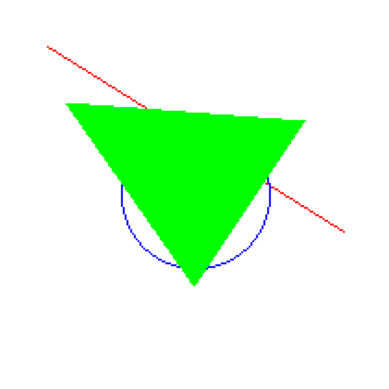

In [13]:
plt.imshow(image)
plt.axis('off')
plt.show()
